# Q1)
## Loading data

In [1]:
import scipy.io as sio
data = sio.loadmat('hw2.mat')['d']
print data.shape
data

(2000, 3)


array([[ 1.89114018,  3.76854407,  0.        ],
       [-2.28581779, -2.07216233,  0.        ],
       [-0.69553511,  0.06180481,  0.        ],
       ..., 
       [ 3.14350341,  3.93200012,  1.        ],
       [ 2.66329108,  2.58056225,  1.        ],
       [ 2.16408437,  1.29141296,  1.        ]])

Data consist of 2 features and 2000 samples and 2 classes.

#### $P(C_1)$:

In [2]:
p_c_1 = sum(data[:,2])/2000
p_c_1

0.5

#### $P(C_0)$:

In [3]:
p_c_0 = 1 - p_c_1
p_c_0

0.5

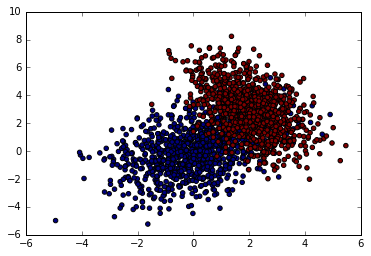

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(data[:,0], data[:,1], c=data[:,2])

In [5]:
import numpy as np
m = {}
S = {}
for c in {0,1}:
    m[c] = np.sum((data[:,2] == c).reshape(len(data),1) * data[:,0:2], axis = 0)/np.sum(data[:,2] == c, axis = 0)
    x = (data[:,2] == c).reshape(len(data),1).T
    S[c] =   np.dot( x * (data[:,0:2] - m[c]).T, x.T*(data[:,0:2] - m[c]))/np.sum(data[:,2] == c, axis = 0)

#### $m_0 = $

In [6]:
print m[0]

[ 0.04988903  0.04037641]


$m_1 = $

In [7]:
print m[1]

[ 2.03527687  2.98677207]


$S_0 = $

In [8]:
print S[0]

[[ 1.99730385  1.00795828]
 [ 1.00795828  2.94816947]]


$S_1 = $

In [9]:
print S[1]

[[ 0.99865193 -0.79252787]
 [-0.79252787  2.93183043]]


### cross validation

In [10]:
# create a random array of indeces
indeces = np.arange(len(data))
np.random.shuffle(indeces)

In [102]:
W = {}
w = {}
w0 = {}
g = {}
for c in {0,1}:
    W[c] = -0.5 * np.linalg.inv(S[c])
    w[c] = np.dot(np.linalg.inv(S[c]), m[c].reshape(2,1))
    w0[c] = -0.5 * np.dot(np.dot(m[c].T, np.linalg.inv(S[c])), m[c]) - 0.5 * np.log(np.linalg.det(S[c])) + np.log(0.5)
    g[c]= np.diagonal(np.dot(np.dot(data[:, 0:2], W[c]),data[:, 0:2].T)).reshape(2000,1) + np.dot(w[c].T,data[:,0:2].T).T +  w0[c] 
g = np.concatenate((g[0], g[1]), axis=1)

In [103]:
g

array([[ -3.93933766,  -1.21666075],
       [ -3.02938709, -26.10122394],
       [ -1.65644695, -10.47311684],
       ..., 
       [ -4.99387812,  -2.44738155],
       [ -3.50043169,  -1.30886546],
       [ -2.61085125,  -1.66892801]])

In [56]:
from __future__ import division
sum(np.argmax(g, axis = 1) == data[:,2])/len(data)

0.89449999999999996

In [93]:

def g(c, x, y):
    p = np.array([x,y])
    return np.dot(np.dot(p, W[c]), p.T) + np.dot(w[c].T,p.T).T +  w0[c] 

In [100]:
X = []
Y= []
for x in np.linspace(-6, 6, num=1000):
    for y in np.linspace(-6, 10, num = 1000):
        if round(g(0,x, y),3) - round(g(1, x, y),3) == 0:
            X.append(x)
            Y.append(y)

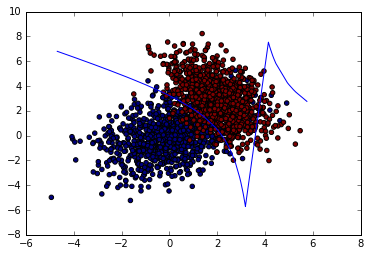

In [101]:
plt.scatter(data[:,0], data[:,1], c=data[:,2])
plt.plot(X,Y)

## computer with cross validation

In [173]:
fold_num = 10

# create a random array of indeces
indeces = np.arange(len(data))
np.random.shuffle(indeces)

for k in range(fold_num):
    #create train and test datasets
    train = np.empty((0,3), int)
    test =np.empty((0,3), int)
    for i in range(len(data)):
        if i >= k * len(data)/fold_num and i < (k+1) * len(data)/fold_num:
            test = np.vstack((test ,data[indeces[i],:]))
        else:
            train = np.vstack((train ,data[indeces[i],:]))
    #now we have train and test
    
    m = {}
    S = {}
    for c in {0,1}:
        m[c] = np.sum((train[:,2] == c).reshape(len(train),1) * train[:,0:2], axis = 0)/np.sum(train[:,2] == c, axis = 0)
        x = (train[:,2] == c).reshape(len(train),1).T
        S[c] =   np.dot( x * (train[:,0:2] - m[c]).T, x.T*(train[:,0:2] - m[c]))/np.sum(train[:,2] == c, axis = 0)
    
    W = {}
    w = {}
    w0 = {}
    g = {}
    for c in {0,1}:
        W[c] = -0.5 * np.linalg.inv(S[c])
        w[c] = np.dot(np.linalg.inv(S[c]), m[c].reshape(2,1))
        w0[c] = -0.5 * np.dot(np.dot(m[c].T, np.linalg.inv(S[c])), m[c]) - 0.5 * np.log(np.linalg.det(S[c])) + np.log(0.5)
        g[c]= np.diagonal(np.dot(np.dot(train[:, 0:2], W[c]),train[:, 0:2].T)).reshape(len(train),1) + np.dot(w[c].T,train[:,0:2].T).T +  w0[c] 
    g = np.concatenate((g[0], g[1]), axis=1)
    train_error = 1 - (sum(np.argmax(g, axis = 1) == train[:,2])/len(train))
    
    g = {}
    for c in {0,1}:
        g[c]= np.diagonal(np.dot(np.dot(test[:, 0:2], W[c]),test[:, 0:2].T)).reshape(len(test),1) + np.dot(w[c].T,test[:,0:2].T).T +  w0[c] 
    g = np.concatenate((g[0], g[1]), axis=1)
    validation_error = 1 - (sum(np.argmax(g, axis = 1) == test[:,2])/len(test))
    print 'iteration #{0}:'.format(k+1)
    print '\t train error: {0}'.format(train_error)
    print '\t validation error: {0}'.format(validation_error)

iteration #1:
	 train error: 0.107777777778
	 validation error: 0.09
iteration #2:
	 train error: 0.108888888889
	 validation error: 0.085
iteration #3:
	 train error: 0.105
	 validation error: 0.115
iteration #4:
	 train error: 0.102222222222
	 validation error: 0.135
iteration #5:
	 train error: 0.104444444444
	 validation error: 0.125
iteration #6:
	 train error: 0.106666666667
	 validation error: 0.095
iteration #7:
	 train error: 0.108888888889
	 validation error: 0.09
iteration #8:
	 train error: 0.103333333333
	 validation error: 0.13
iteration #9:
	 train error: 0.108333333333
	 validation error: 0.085
iteration #10:
	 train error: 0.105555555556
	 validation error: 0.115


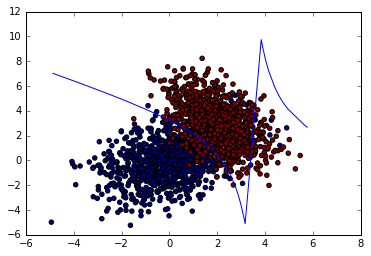

In [174]:
#last iteration
def g(c, x, y):
    p = np.array([x,y])
    return np.dot(np.dot(p, W[c]), p.T) + np.dot(w[c].T,p.T).T +  w0[c] 
X = []
Y = []
for x in np.linspace(-6, 6, num=1000):
    for y in np.linspace(-6, 10, num = 1000):
        if round(g(0,x, y),3) - round(g(1, x, y),3) == 0:
            X.append(x)
            Y.append(y)
plt.scatter(data[:,0], data[:,1], c=data[:,2])
plt.plot(X,Y)    

# Q2)

In [175]:
for k in range(fold_num):
    #create train and test datasets
    train = np.empty((0,3), int)
    test =np.empty((0,3), int)
    for i in range(len(data)):
        if i >= k * len(data)/fold_num and i < (k+1) * len(data)/fold_num:
            test = np.vstack((test ,data[indeces[i],:]))
        else:
            train = np.vstack((train ,data[indeces[i],:]))
    #now we have train and test
    
    m = {}
    S = {}
    for c in {0,1}:
        m[c] = np.sum((train[:,2] == c).reshape(len(train),1) * train[:,0:2], axis = 0)/np.sum(train[:,2] == c, axis = 0)
        x = (train[:,2] == c).reshape(len(train),1).T
        S[c] =   np.dot( x * (train[:,0:2] - m[c]).T, x.T*(train[:,0:2] - m[c]))/np.sum(train[:,2] == c, axis = 0)
    
    W = {}
    w = {}
    w0 = {}
    g = {}
    for c in {0,1}:
        w[c] = np.dot(np.linalg.inv(S[c]), m[c].reshape(2,1))
        w0[c] = -0.5 * np.dot(np.dot(m[c].T, np.linalg.inv(S[c])), m[c]) + np.log(0.5)
        g[c]=  np.dot(w[c].T,train[:,0:2].T).T +  w0[c] 
    g = np.concatenate((g[0], g[1]), axis=1)
    train_error = 1 - (sum(np.argmax(g, axis = 1) == train[:,2])/len(train))
    
    g = {}
    for c in {0,1}:
        g[c]= np.dot(w[c].T,test[:,0:2].T).T +  w0[c] 
    g = np.concatenate((g[0], g[1]), axis=1)
    validation_error = 1 - (sum(np.argmax(g, axis = 1) == test[:,2])/len(test))
    print 'iteration #{0}:'.format(k+1)
    print '\t train error: {0}'.format(train_error)
    print '\t validation error: {0}'.format(validation_error)

iteration #1:
	 train error: 0.109444444444
	 validation error: 0.095
iteration #2:
	 train error: 0.11
	 validation error: 0.09
iteration #3:
	 train error: 0.107222222222
	 validation error: 0.11
iteration #4:
	 train error: 0.107222222222
	 validation error: 0.11
iteration #5:
	 train error: 0.105555555556
	 validation error: 0.125
iteration #6:
	 train error: 0.107777777778
	 validation error: 0.115
iteration #7:
	 train error: 0.106666666667
	 validation error: 0.115
iteration #8:
	 train error: 0.107222222222
	 validation error: 0.115
iteration #9:
	 train error: 0.108888888889
	 validation error: 0.095
iteration #10:
	 train error: 0.107777777778
	 validation error: 0.105


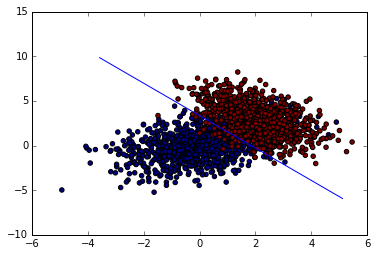

In [176]:
#last iteration
def g(c, x, y):
    p = np.array([x,y])
    return np.dot(w[c].T,p.T).T +  w0[c] 
X = []
Y = []
for x in np.linspace(-6, 6, num=1000):
    for y in np.linspace(-6, 10, num = 1000):
        if round(g(0,x, y),3) - round(g(1, x, y),3) == 0:
            X.append(x)
            Y.append(y)
plt.scatter(data[:,0], data[:,1], c=data[:,2])
plt.plot(X,Y)    

# Q3)

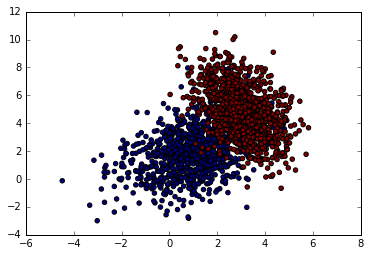

In [193]:
mean = [1, 2]
cov = [[2, 1], [1, 3]]
c0 = np.random.multivariate_normal(mean, cov, 1000)
c0 = np.insert(c0, 2, 0, axis=1)

mean = [3, 5]
cov = [[1, -0.8], [-0.8, 3]]
c1 = np.random.multivariate_normal(mean, cov, 1000)
c1 = np.insert(c1, 2, 1, axis=1)

data = np.vstack((c0,c1))
plt.scatter(data[:,0], data[:,1], c=data[:,2])

# Q4)

In [194]:
for k in range(fold_num):
    #create train and test datasets
    train = np.empty((0,3), int)
    test =np.empty((0,3), int)
    for i in range(len(data)):
        if i >= k * len(data)/fold_num and i < (k+1) * len(data)/fold_num:
            test = np.vstack((test ,data[indeces[i],:]))
        else:
            train = np.vstack((train ,data[indeces[i],:]))
    #now we have train and test
    
    m = {}
    S = {}
    for c in {0,1}:
        m[c] = np.sum((train[:,2] == c).reshape(len(train),1) * train[:,0:2], axis = 0)/np.sum(train[:,2] == c, axis = 0)
        x = (train[:,2] == c).reshape(len(train),1).T
        S[c] =   np.dot( x * (train[:,0:2] - m[c]).T, x.T*(train[:,0:2] - m[c]))/np.sum(train[:,2] == c, axis = 0)
    
    W = {}
    w = {}
    w0 = {}
    g = {}
    for c in {0,1}:
        W[c] = -0.5 * np.linalg.inv(S[c])
        w[c] = np.dot(np.linalg.inv(S[c]), m[c].reshape(2,1))
        w0[c] = -0.5 * np.dot(np.dot(m[c].T, np.linalg.inv(S[c])), m[c]) - 0.5 * np.log(np.linalg.det(S[c])) + np.log(0.5)
        g[c]= np.diagonal(np.dot(np.dot(train[:, 0:2], W[c]),train[:, 0:2].T)).reshape(len(train),1) + np.dot(w[c].T,train[:,0:2].T).T +  w0[c] 
    g = np.concatenate((g[0], g[1]), axis=1)
    train_error = 1 - (sum(np.argmax(g, axis = 1) == train[:,2])/len(train))
    
    g = {}
    for c in {0,1}:
        g[c]= np.diagonal(np.dot(np.dot(test[:, 0:2], W[c]),test[:, 0:2].T)).reshape(len(test),1) + np.dot(w[c].T,test[:,0:2].T).T +  w0[c] 
    g = np.concatenate((g[0], g[1]), axis=1)
    validation_error = 1 - (sum(np.argmax(g, axis = 1) == test[:,2])/len(test))
    print 'iteration #{0}:'.format(k+1)
    print '\t train error: {0}'.format(train_error)
    print '\t validation error: {0}'.format(validation_error)

iteration #1:
	 train error: 0.11
	 validation error: 0.085
iteration #2:
	 train error: 0.111111111111
	 validation error: 0.075
iteration #3:
	 train error: 0.101666666667
	 validation error: 0.155
iteration #4:
	 train error: 0.106666666667
	 validation error: 0.115
iteration #5:
	 train error: 0.111666666667
	 validation error: 0.07
iteration #6:
	 train error: 0.110555555556
	 validation error: 0.085
iteration #7:
	 train error: 0.107777777778
	 validation error: 0.105
iteration #8:
	 train error: 0.108333333333
	 validation error: 0.105
iteration #9:
	 train error: 0.106111111111
	 validation error: 0.125
iteration #10:
	 train error: 0.102222222222
	 validation error: 0.155


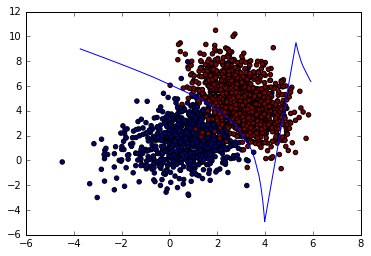

In [195]:
#last iteration
def g(c, x, y):
    p = np.array([x,y])
    return np.dot(np.dot(p, W[c]), p.T) + np.dot(w[c].T,p.T).T +  w0[c] 
X = []
Y = []
for x in np.linspace(-6, 6, num=1000):
    for y in np.linspace(-6, 10, num = 1000):
        if round(g(0,x, y),3) - round(g(1, x, y),3) == 0:
            X.append(x)
            Y.append(y)
plt.scatter(data[:,0], data[:,1], c=data[:,2])
plt.plot(X,Y)    